In [8]:
%matplotlib inline
import os
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
from cdo import *
cdo = Cdo()

from metpy.units import units
from LinearRegression import linear_regression
# import cdstoolbox as ct

data_GHCNv4   = '/work/mh0033/m301036/LSAT/Data/gistemp250_GHCNv4.nc'
data_CRUTEMP  = '/work/mh0033/m301036/LSAT/Data/CRUTEM.5.0.1.0.anomalies.nc'
data_MLOST    = '/work/mh0033/m301036/LSAT/Data/air.mon.anom.nc'
data_Berkely  = '/work/mh0033/m301036/LSAT/Data/Complete_TAVG_LatLong1.nc'
data_GISSTEMP = '/work/mh0033/m301036/LSAT/Data/air.2x2.250.mon.anom.land.nc'

In [3]:
#Using dateTime to select key period
tas_GISS    = xr.open_dataset(data_GISSTEMP)
tas_CRUTEMP = xr.open_dataset(data_CRUTEMP) 
tas_MLOST   = xr.open_dataset(data_MLOST,decode_times=False)
units, reference_data = tas_MLOST.time.attrs['units'].split('since')
# display(tas_MLOST.time)

tas_GHCNv4  = xr.open_dataset(data_GHCNv4)
tas_CRUTEMP = tas_CRUTEMP.astype(np.float64)
tas_GHCNv4  = tas_GHCNv4.astype(np.float64)
# display(tas_GISS)
# display(tas_CRUTEMP)
# display(tas_MLOST)
# display(tas_GHCNv4)

tas_CRUTEMP = tas_CRUTEMP-273.15
tas_GHCNv4  = tas_GHCNv4-273.15
# tas_MLOST_sel = tas_MLOST_sel-273.15

In [3]:
#---------------------------------------------------------------------------
# Function to calculate the running mean
# The Savitzky-Golay filter uses convolution process applied on an array for
# smoothing. The Python package scipy provide the function as shown in the
# next example.
#---------------------------------------------------------------------------
def calc_running_mean(data, window_length=20, polyorder=3, mode='nearest'):
    return scipy.signal.savgol_filter(data,
                                      window_length,
                                      polyorder,
                                      mode='nearest')

In [4]:
tas_MLOST_recon = pd.to_datetime(tas_MLOST.time.data, unit='D', origin=pd.Timestamp('1800-01-01'))
tas_MLOST_recon

DatetimeIndex(['1850-01-01', '1850-02-01', '1850-03-01', '1850-04-01',
               '1850-05-01', '1850-06-01', '1850-07-01', '1850-08-01',
               '1850-09-01', '1850-10-01',
               ...
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01'],
              dtype='datetime64[ns]', length=2079, freq=None)

In [5]:
tas_MLOST = tas_MLOST.assign_coords({"time":(tas_MLOST_recon)})
tas_MLOST

<xarray.Dataset>
Dimensions:    (lat: 36, lon: 72, time: 2079, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon        (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time       (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    air        (time, lat, lon) float32 ...
Attributes: (12/22)
    Conventions:           CF-1.0
    dataset_title:         NOAA Global Surface Temperature (NOAAGlobalTemp)
    keywords_vocabulary:   Climate and Forecast (CF) Standard Name Table (Ver...
    keywords:              Earth Science > Oceans > Ocean Temperature > Sea S...
    cdm_data_type:         Grid
    dataset_citation_url:  https://doi.org/10.25921/9qth-2p70
    ...                    ...
    References:            https://www.psl.noaa.gov/data/gridded/data.noaaglo...
    version:               V5.1
    comment:               Merged land ocean surface temperature anomalies. V...
    history:               Updated from V5.0 to V5.1 Feb 2023 using data from...
    Source:                https://www.ncei.noaa.gov/data/noaa-global-surface...
    data_modified:         2023-04-18

In [4]:
#convert datatype to float64
# temp.tempanomaly.data
# temp_con = temp
# temp_con = temp.astype(np.float64)
# temp_con
# print(temp_con.dtype)
temp_NH = temp.tas.loc[:,0:90,:]
tas_NH = temp_NH -273.15 #coverted to the ceilsus  
# temp_NH
display(tas_NH)

<xarray.DataArray 'tas' (time: 2078, latitude: 18, longitude: 72)>
array([[[     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        ...,
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan]],

       [[     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
...
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan]],

       [[     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ..., -272.92 , -272.623,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        ...,
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan],
        [     nan,      nan,      nan, ...,      nan,      nan,
              nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2023-02-15
  * latitude   (latitude) float64 2.5 7.5 12.5 17.5 22.5 ... 72.5 77.5 82.5 87.5
  * longitude  (longitude) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5

In [23]:
tas_avg = tas_NH.mean()
tas_anomaly = tas_NH - tas_avg
tas_anomaly

<xarray.DataArray 'tas' (time: 2078, latitude: 18, longitude: 72)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.06686835,
         0.36386835,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2023-02-15
  * latitude   (latitude) float64 2.5 7.5 12.5 17.5 22.5 ... 72.5 77.5 82.5 87.5
  * longitude  (longitude) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5

In [26]:
tas_mmean = tas_anomaly.mean(['latitude','longitude']).groupby('time.month').mean()

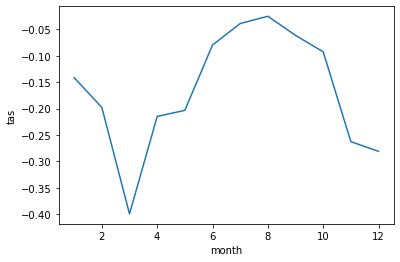

In [27]:
tas_mmean.plot()

In [33]:
tas_season = tas_anomaly.mean(['latitude','longitude']).groupby('time.season')
display(tas_season)

DataArrayGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

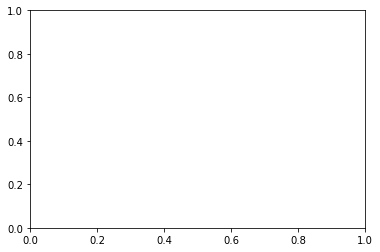

In [ ]:
# cdo.yseasmen(options='-f nc -b 32', input='', output='/home/m/m301036/josie/LSAT')

In [6]:
month_length = temp_anomaly.time.dt.days_in_month
month_length

<xarray.DataArray 'days_in_month' (time: 1719)>
array([31, 29, 31, ..., 31, 28, 31], dtype=int32)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-03-15

In [32]:
weights = month_length.groupby('time.season')/month_length.groupby('time.season').sum()
np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

In [8]:
# Calculate the weighted average
# temp_grouped = temp_anomaly.groupby('time.month').mean(["latitude","longitude"])
# temp_grouped

/tmp/ipykernel_325013/2071817665.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yearly_split = np.array(np.split(tas_anomaly, ind, axis=0))


(174,)

In [10]:
monthly_mean = yearly_split.mean(axis=0)
monthly_mean

array([], shape=(0, 18, 72), dtype=float64)

In [7]:
temp_season_monthly = temp_anomaly.groupby("time.month").mean(["lat","lon"])
temp_season_monthly

<xarray.DataArray 'tempanomaly' (time: 1719)>
array([-0.23143529, -1.14825136, -1.29377223, ...,  1.67109619,
        1.86830596,  2.19104157])
Coordinates:
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-03-15

In [ ]:
 def get_gpp_data(self, interval='season'):
        """
        get surface GPP data for JSBACH

        todo temporal aggregation of data --> or leave it to the user!
        """
        cdo = Cdo()
        v = 'var167'
        y1 = str(self.start_time)[0:10]
        y2 = str(self.stop_time)[0:10]
        rawfilename = self.data_dir + 'data/model/' + self.experiment + '_' + y1[
            0:4] + '-' + y2[0:4] + '.nc'
        times_in_file = int(''.join(cdo.ntime(input=rawfilename)))

        if interval == 'season':
            if times_in_file != 4:
                tmp_file = get_temporary_directory() + os.path.basename(
                    rawfilename)
                cdo.yseasmean(options='-f nc -b 32 -r ',
                              input='-selvar,' + v + ' ' + rawfilename,
                              output=tmp_file[:-3] + '_yseasmean.nc')
                rawfilename = tmp_file[:-3] + '_yseasmean.nc'

        if interval == 'monthly':
            if times_in_file != 12:
                tmp_file = get_temporary_directory() + os.path.basename(
                    rawfilename)
                cdo.ymonmean(options='-f nc -b 32 -r ',
                             input='-selvar,' + v + ' ' + rawfilename,
                             output=tmp_file[:-3] + '_ymonmean.nc')
                rawfilename = tmp_file[:-3] + '_ymonmean.nc'

        if not os.path.exists(rawfilename):
            return None

        filename = rawfilename

        #--- read land-sea mask
        ls_mask = get_T63_landseamask(self.shift_lon)

        #--- read SW up data
        gpp = Data4D(filename,
                     v,
                     read=True,
                     label=self.experiment + ' ' + v,
                     unit='gC m-2 a-1',
                     lat_name='lat',
                     lon_name='lon',
                     shift_lon=self.shift_lon,
                     mask=ls_mask.data.data,
                     scale_factor=3600. * 24. * 30. / 0.083)

        return gpp.sum_data4D()

In [14]:
#calculate the trend with the least square regression
# x = np.arange(1900,2014, 1, dtype = int)
# y = temp_weighted.tempanomaly[0:0, :, :]
# y

<xarray.DataArray 'tempanomaly' (season: 0, lat: 90, lon: 180)>
array([], shape=(0, 90, 180), dtype=float64)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * season   (season) object

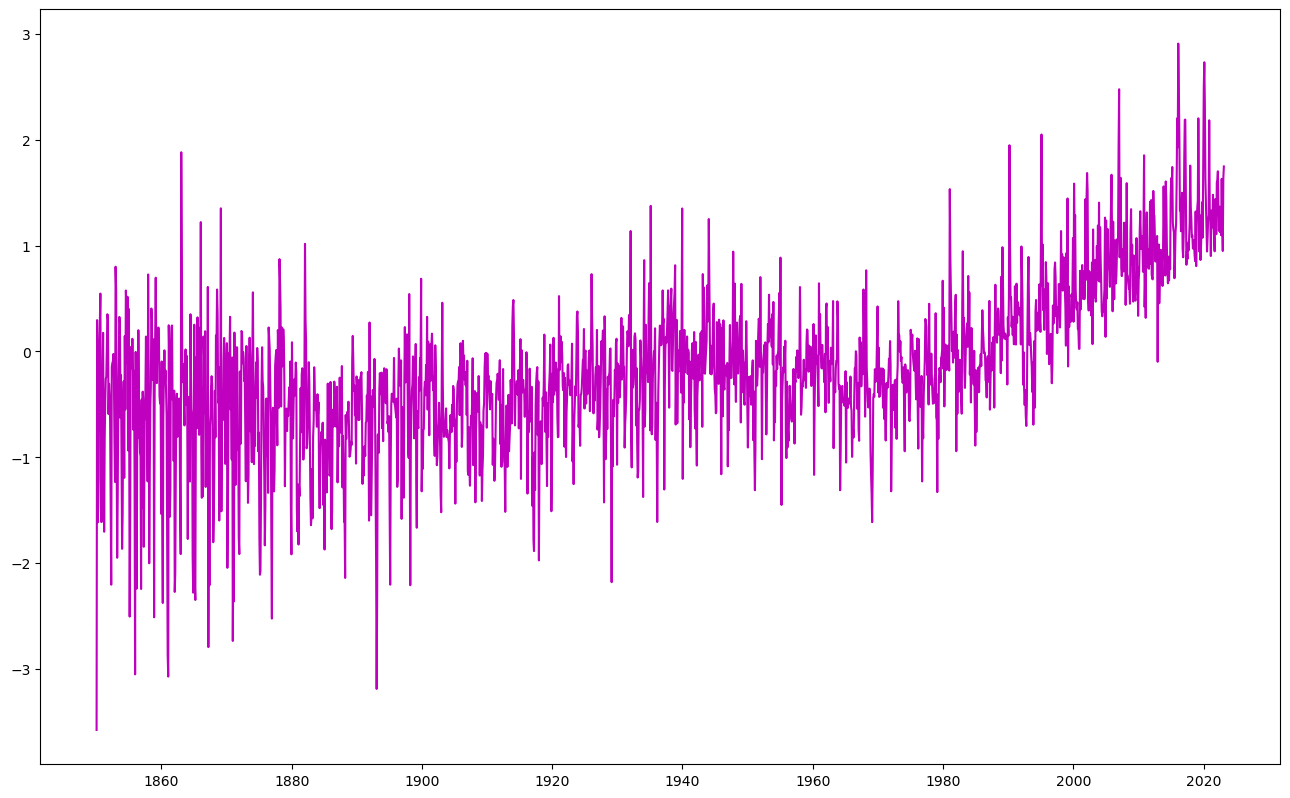

In [18]:
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_grouped.time, temp_grouped, color = 'm')

KeyError: 1

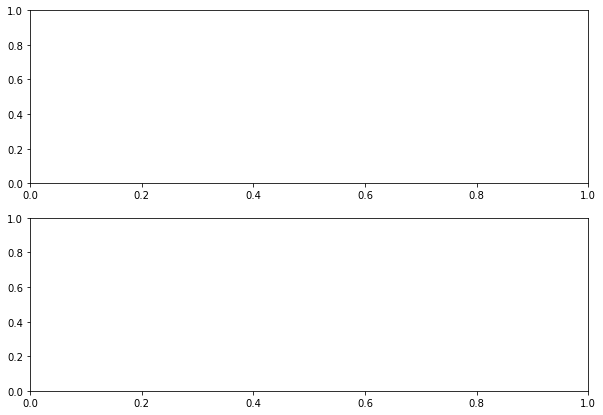

In [20]:
colors = {3: "grey", 6: "lightgreen", 9: "green", 12: "purple"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharey=True)
for month, arr in temp_grouped.groupby('time.month'):
    arr.plot(ax=ax1,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor=colors[month],
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set(title="Weighted Seasonal Change in Mean Temperature Over Time")

for month, arr in temp_grouped.groupby('time.month'):
    arr.plot(ax=ax2,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor=colors[month],
             label=seasons[month])

ax2.set(title="Unweighted Seasonal Change in Mean Temperature Over Time")
f.tight_layout()
plt.show()

In [12]:
# display(temp_weighted.tempanomaly[0,:,:].max())
# temp_weighted.tempanomaly[0,:,:].min()

# min(temp_weighted[0,:,:])

<xarray.DataArray 'tempanomaly' ()>
array(1.6052607)
Coordinates:
    season   <U3 'DJF'

<xarray.DataArray 'tempanomaly' ()>
array(-1.22770439)
Coordinates:
    season   <U3 'DJF'

In [13]:
# sel_time = [1850, 2014]
# #--reference time range for the 30 year climatology
# ref_time = [1981, 2010]
# # t_i = temp.time[temp.year == sel_time[0]]
# # t_j = temp.time[temp.year == sel_time[1]]range(t_i[0], t_j[0]+1)

# temp_sel = temp.tempanomaly.loc['1900-01-15':'2014-12-31',0:90,:]
# temp_sel
# # anomaly_temp_sel = calc_anoamlies(temp_sel, reftime = ref_time, name=NH)

# # lat = temp['latitude']
# # lon = temp['longitude']

In [14]:
# only used for comparisons
temp_unweighted = temp_con.groupby("time.season").mean("time")
temp_diff = temp_weighted - temp_unweighted

# temp_diff.tempanomaly[0,:,:].max()
# temp_diff.tempanomaly[0,:,:].min()

<xarray.DataArray 'tempanomaly' ()>
array(-2.60916383)
Coordinates:
    season   <U3 'DJF'

In [16]:
temp_sel_JJA = temp_sel.loc[temp_sel.time.dt.month.isin([6,7,8]),:,:]
temp_sel_JJA
# temp_sel.time.dt.month.isin([6,7,8])

NameError: name 'temp_sel' is not defined

In [1]:
temp_sel_DJF= temp_sel.loc[temp_sel.time.dt.month.isin([12,1,2]),:,:]
temp_sel_DJF

NameError: name 'temp_sel' is not defined

In [ ]:
# Let's plot the original data for 1st year:
fig, axes = plt.figure(figsize = [13,4.5])
ax1 =plt.subplot(1,2,1, projection=ccrs.PlateCarree())
ax1.set_ylim([0, 90])
ax1.set_xticks(np.arange(-180,180,30), crs = ccrs.PlateCarree())
ax1.set_yticks(np.arange(0,90,30), crs = ccrs.PlateCarree())

# ax1.xaxis.set_major_formatter(cticker.LongitudeFormatter())
# ax1.yaxis.set_major_formatter(cticker.LatitudeFormatter())

# c1=ax1.contour(lon,lat,temp_sel,transform=ccrs.PlaateCarree())
temp_sel_DJF.tempanomaly.loc[0,:,:].plot(cmap = 'jet')
plt.show()

Text(0.5, 1.02, 'Seasonal Surface Air Temperature')

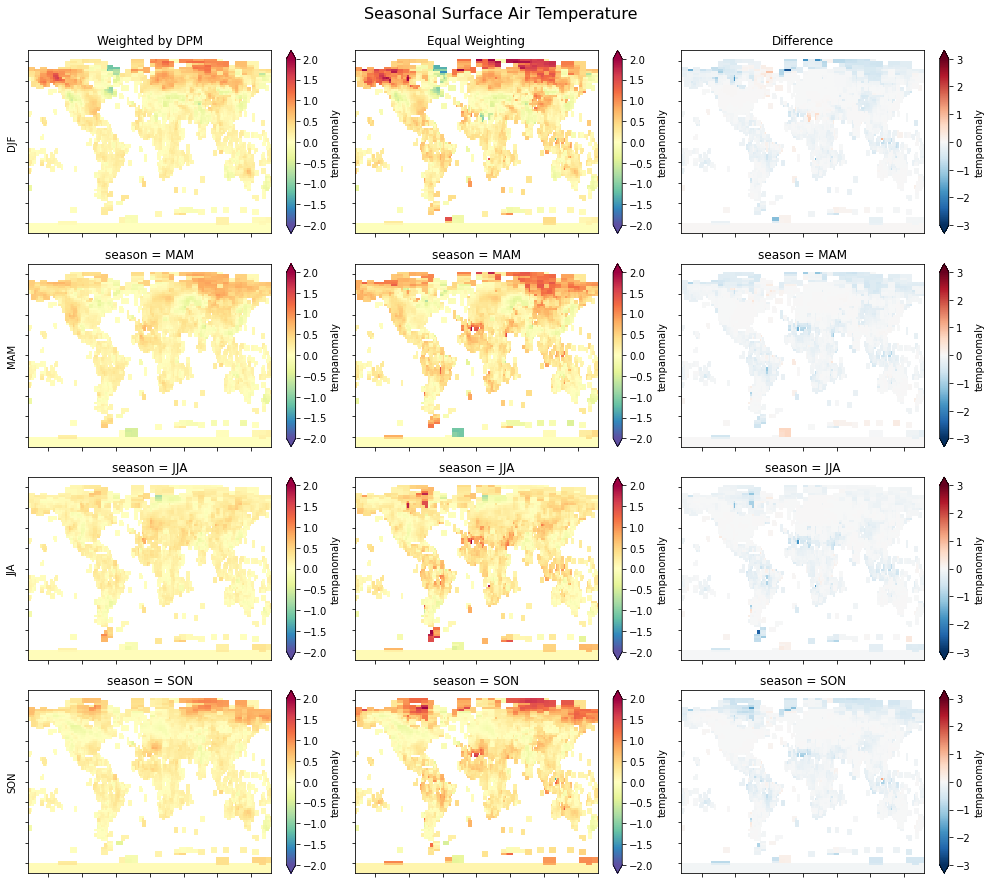

In [ ]:
# Quick plot to show the results
notnull = pd.notnull(temp_unweighted["tempanomaly"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    temp_weighted["tempanomaly"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=-2.0,
        vmax=2.0,
        cmap="Spectral_r",
        add_colorbar=True,
        extend="both",
    )

    temp_unweighted["tempanomaly"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=-2.0,
        vmax=2.0,
        cmap="Spectral_r",
        add_colorbar=True,
        extend="both",
    )

    temp_diff["tempanomaly"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-3.0,
        vmax=3.0,
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM")
axes[0, 1].set_title("Equal Weighting")
axes[0, 2].set_title("Difference")

plt.tight_layout()

fig.suptitle("Seasonal Surface Air Temperature", fontsize=16, y=1.02)